In [1]:

%load_ext autoreload
%autoreload 2

In [30]:
from uav_active_sensing.config import PROCESSED_DATA_DIR
from uav_active_sensing.pytorch_dataloaders import TinyImageNetDataset
from uav_active_sensing.env import ImageEnv

import random as rd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.transforms.functional import resize

In [3]:
cifar10_processed_dir = PROCESSED_DATA_DIR / "cifar10"

cifar10_transform = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

cifar10_train_dataset = datasets.CIFAR10(
    root=cifar10_processed_dir, train=True, download=False, transform=cifar10_transform
)
cifar10_test_dataset = datasets.CIFAR10(
    root=cifar10_processed_dir, train=False, download=False, transform=cifar10_transform
)

cifar10_train_loader = DataLoader(cifar10_train_dataset, batch_size=1, shuffle=True)
cifar10_test_loader = DataLoader(cifar10_test_dataset, batch_size=1, shuffle=False)

In [4]:

TINY_IMAGENET_PROCESSED_DIR = PROCESSED_DATA_DIR / "tiny_imagenet/tiny-imagenet-200"

tiny_imagenet_transform = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

tiny_imagenet_train_dataset = TinyImageNetDataset(
    root_dir=TINY_IMAGENET_PROCESSED_DIR, split="train", transform=tiny_imagenet_transform
)
tiny_imagenet_val_dataset = TinyImageNetDataset(
    root_dir=TINY_IMAGENET_PROCESSED_DIR, split="val", transform=tiny_imagenet_transform
)

tiny_imagenet_train_loader = DataLoader(tiny_imagenet_train_dataset, batch_size=1, shuffle=True)
tiny_imagenet_val_loader = DataLoader(tiny_imagenet_val_dataset, batch_size=1, shuffle=False)

In [5]:
# Class labels for CIFAR-10
classes = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

# Function to visualize images from a batch


def visualize_batch(images, labels, classes, num_samples=1):
    plt.figure(figsize=(12, 5))
    for i in range(num_samples):
        plt.subplot(2, 5, i + 1)
        image = images[i].permute(1, 2, 0).numpy()
        plt.imshow(image)
        plt.title(classes[labels[i].item()])
        plt.axis("off")
    plt.tight_layout()
    plt.show()

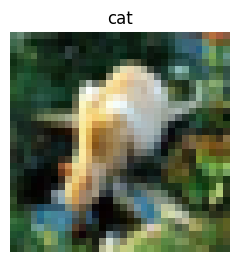

In [6]:
# Get a sample batch from the DataLoader
sample_batch = next(iter(cifar10_train_loader))
images, labels = sample_batch

# Visualize the first 10 images from the batch
visualize_batch(images, labels, classes, num_samples=1)

In [7]:
def visualize_tensors(tensor1, tensor2):
    """
    Visualizes two PyTorch tensors as images side by side.
    If tensors are 3D (e.g., RGB), they will be shown as color images.
    If tensors are 2D, they will be shown as grayscale images.

    Args:
        tensor1 (torch.Tensor): The first tensor to display.
        tensor2 (torch.Tensor): The second tensor to display.
    """
    # Ensure tensors are at least 2D
    if tensor1.dim() < 2 or tensor2.dim() < 2:
        raise ValueError("Tensors must be at least 2D.")

    # If tensors are 3D, check if they represent RGB images (channels last)
    if tensor1.dim() == 3 and tensor1.shape[0] in {3, 1}:  # RGB or grayscale
        tensor1 = tensor1.permute(1, 2, 0)  # Convert (C, H, W) to (H, W, C)
    if tensor2.dim() == 3 and tensor2.shape[0] in {3, 1}:  # RGB or grayscale
        tensor2 = tensor2.permute(1, 2, 0)  # Convert (C, H, W) to (H, W, C)

    # Plot both tensors as images
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # First tensor
    axes[0].imshow(tensor1.numpy())
    axes[0].set_title("Tensor 1")
    axes[0].axis('off')  # Hide axis

    # Second tensor
    axes[1].imshow(tensor2.numpy())
    axes[1].set_title("Tensor 2")
    axes[1].axis('off')  # Hide axis

    plt.show()

In [33]:
def random_walk(env: ImageEnv, steps: int):
    for _ in range(steps):
        dx = rd.choice([-10, 0, 10])  # Move left, stay, or move right
        dy = rd.choice([-10, 0, 10])  # Move up, stay, or move down
        dz = rd.choice([-1, 0, 1])  # Zoom in, stay, or zoom out

        env.move(dx, dy, dz)

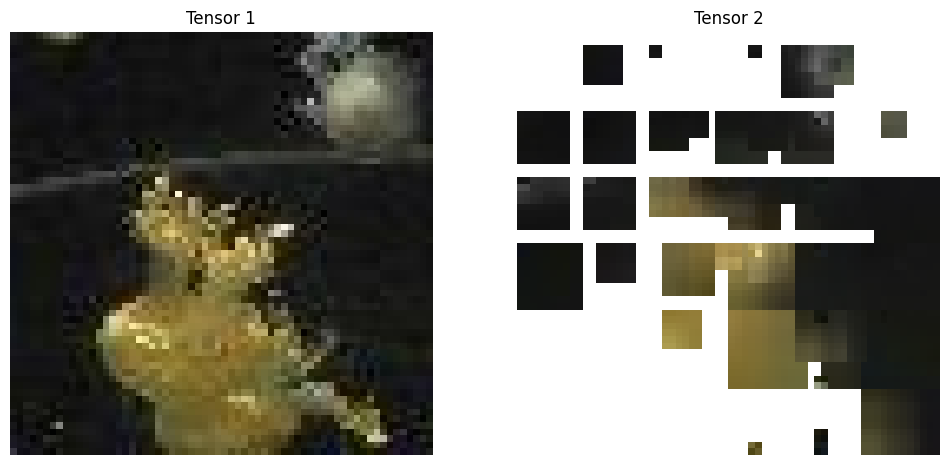

In [38]:
IMG_FOV_RATIO = 32


image, label = tiny_imagenet_train_dataset[15000]
env = ImageEnv(image, IMG_FOV_RATIO)


random_walk(env, 100)
visualize_tensors(env.img, env.sampled_img)